In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

from matplotlib import rc

import mplcyberpunk
plt.style.use('cyberpunk')
warnings.filterwarnings(action="ignore")

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', size=12)
%matplotlib inline

/Users/tastebread/miniforge3/envs/tastebread/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = '/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
display(labels.head(5)) # has_cactus 0은 선인장이 없고 1은 선인장이 있다.
display(submission.head(5))

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


([<matplotlib.patches.Wedge at 0x13fce9640>,
 [Text(-0.7793519565739234, 0.7762799287527649, 'has_cactus'),
  Text(0.7793519929142085, -0.776279892268666, "Hasn't cactus")],
 [Text(-0.42510106722213997, 0.42342541568332626, '75.1%'),
  Text(0.4251010870441137, -0.42342539578290866, '24.9%')])

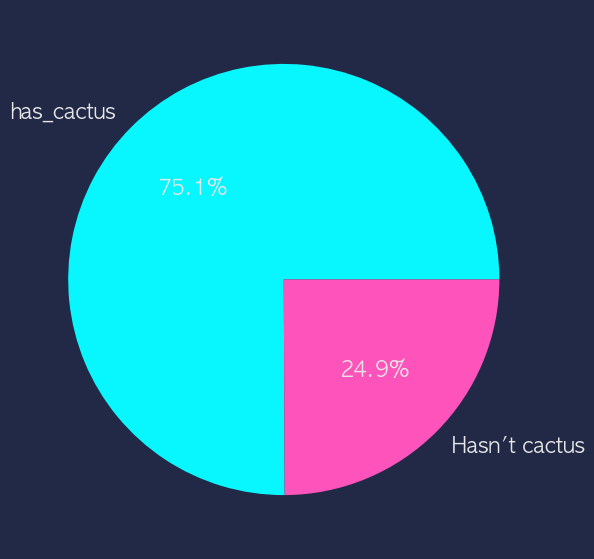

In [5]:
#데이터 시각화 
#타깃값이 얼마나 불균현한지 알아보고, 실제 이미지가 어떻게 생겼는지 한번 살펴보기 위함.

mpl.rc('font',size=15)
plt.figure(figsize=(7,7))

label = ['has_cactus', 'Hasn\'t cactus']

plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')

In [6]:
#이미지 출력 ZipFile을 이용해서 zip 파일 풀어보기

from zipfile import ZipFile

#훈련 이미지 데이터 압축 풀기
with ZipFile(data_path + 'train.zip') as zipper:
    zipper.extractall()

#테스트 이미지 데이터 압축 풀기
with ZipFile(data_path + 'test.zip') as zipper:
    zipper.extractall()

훈련 데이터 개수 : 17500
테스트 데이터 개수 : 4000


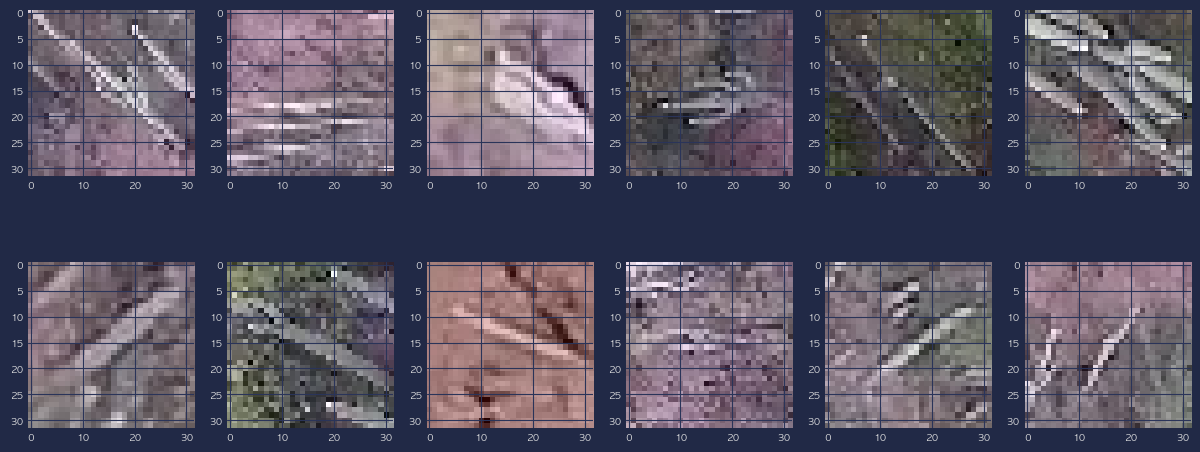

In [18]:
#train, test 의 각각 이미지 파일이 몇개 있는지 알아보자
import os
import matplotlib.gridspec as gridspec
import cv2
Ntrain = len(os.listdir('/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/train'))
Ntest = len(os.listdir('/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/test'))

print("훈련 데이터 개수 : {0}".format(Ntrain))
print("테스트 데이터 개수 : {0}".format(Ntest))

#이미지 데이터 몇개 출력

mpl.rc('font',size=7)
plt.figure(figsize=(15,6)) #전체 figure 사이즈
grid = gridspec.GridSpec(2,6) # 서브플롯 배치 (2행 6열)

last_has_cactus = labels[labels['has_cactus'] == 1]['id'][-12:]

for idx, img_name in enumerate(last_has_cactus):
    img_path = '/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/train/' + img_name#이미지 파일 경로
    image = cv2.imread(img_path) # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx])
    ax.imshow(image) #이미지 출력

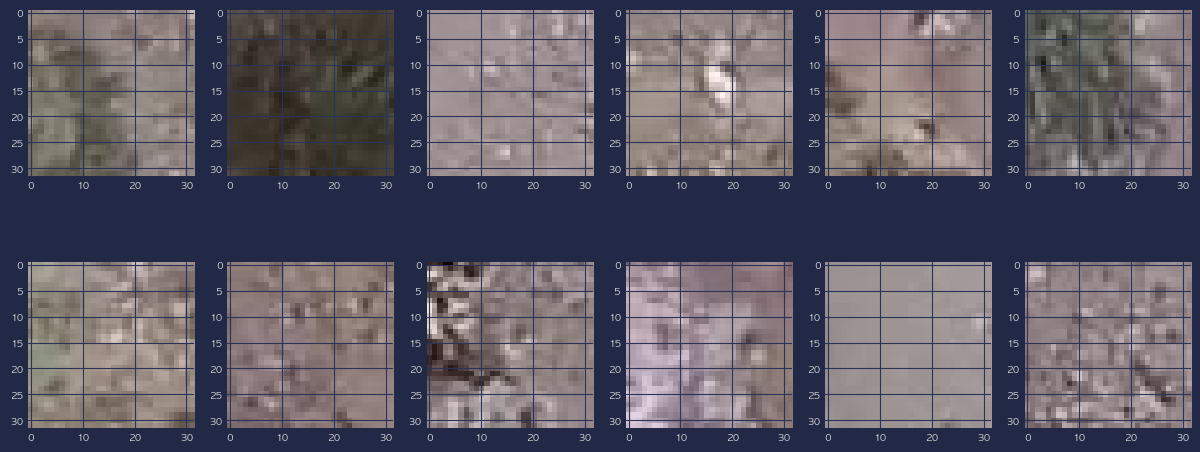

In [19]:
#선인장이 없는 이미지

mpl.rc('font',size=7)
plt.figure(figsize=(15,6)) #전체 figure 사이즈
grid = gridspec.GridSpec(2,6) # 서브플롯 배치 (2행 6열)

last_has_cactus = labels[labels['has_cactus'] == 0]['id'][-12:]

for idx, img_name in enumerate(last_has_cactus):
    img_path = '/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/train/' + img_name#이미지 파일 경로
    image = cv2.imread(img_path) # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx])
    ax.imshow(image) #이미지 출력

In [25]:
#파이토치
#시드값 고정
device = torch.device("mps")

import torch
import random
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.mps.manual_seed(seed)
torch.mps.manual_seed(seed)
torch.backends.mps.deterministic = True
torch.backends.mps.benchmark = False
torch.backends.mps.enabled = False

device = torch.device("mps")

device

device(type='mps')

In [27]:
from sklearn.model_selection import train_test_split

#훈련, 검증 데이터 분리
train, val = train_test_split(labels,test_size=0.1,stratify=labels['has_cactus'],
                              random_state=50)

print("훈련 데이터 개수 : ",len(train))
print("검증 데이터 개수 : ",len(val))

훈련 데이터 개수 :  15750
검증 데이터 개수 :  1750


In [29]:
"""
파이토치로 신경망 모델을 구축하려면 데이셋도 어느정도 일정한 형식에 맞게 정의해야줘야한다.
"""
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    #초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__()
        #전달 받을 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    #데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)
    
    #인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx,0] #이미지 id
        img_path = self.img_dir + img_id #이미지 파일 경로
        image = cv2.imread(img_path) # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        label = self.df.iloc[idx, 1] #이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 변환기가 있다면 이미지 변환
        return image, label
    



In [32]:
from torchvision import transforms

transform = transforms.ToTensor()

#데이터셋 만들기
train = ImageDataset(df=train,img_dir='/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/train/', transform=transform)
val = ImageDataset(df=val,img_dir='/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/train/', transform=transform)

In [42]:
#데이터 로더 생성
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=train, batch_size=32, shuffle=True)
loader_val = DataLoader(dataset=val, batch_size=32, shuffle=False)

In [50]:
#모델 생성 CNN

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    #신경망 계층 정의
    def __init__(self):
        super().__init__()

        #첫 번째 합성곱 계층
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2)
                             # 입력 데이터의 채널수,출력 데이터의 채널 수, 필터(커널)크기,스트라이드 크기, 패딩 크기
        #두 번째 합성곱 계층
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64,kernel_size=3,padding=2)

        #최대 풀링 계층
        self.max_pool = nn.MaxPool2d(kernel_size=2)
        #평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size=2)
        #전결합 계층
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)

    #순전파 출력 정의
    def forward(self,x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        x = x.view(-1,64*4*4) # 평탄화
        x = self.fc(x)

        return x


In [51]:
#device 장비 할당

model = Model().to(device)
model

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

In [52]:
#모델을 훈련시키기전에 손실함수,옵티마이저 정의

#손실함수 설정 : 신경망 모델 훈련은 가중치를 갱신하는 작업인데, 가중치 갱신은 예측값과 실젯값의 손실이 작아지는 방향으로 이루어지기때문에 손실값을 구하는 함수를 구현한다.
criterion = nn.CrossEntropyLoss()

In [53]:
#옵티마이저 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [54]:
#모델 훈련 에폭은 10으로 설정하고 하나의 에폭이 끝날 때마다 손실값을 출력하도록 설정

epochs = 10 # 총 에폭

for epoch in range(epochs):
    epoch_loss = 0 # 에폭별 손실값 초기화

    # '반복 횟수'만큼 반복
    for images, labels in loader_train:
        #이미지,레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)

        #옵티마이저 내 기울기 초기화
        optimizer.zero_grad()

        #순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)

        #손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)

        #현재 배치에서의 손실 추가
        epoch_loss += loss.item() # 역전파 수행
        loss.backward()

        #가중치 갱신
        optimizer.step()

    print(f'에폭 [{epoch+1} / {epochs}] - 손실값 : {epoch_loss/len(loader_train):.4f}')

에폭 [1 / 10] - 손실값 : 0.5209
에폭 [2 / 10] - 손실값 : 0.3478
에폭 [3 / 10] - 손실값 : 0.2410
에폭 [4 / 10] - 손실값 : 0.1947
에폭 [5 / 10] - 손실값 : 0.1622
에폭 [6 / 10] - 손실값 : 0.1504
에폭 [7 / 10] - 손실값 : 0.1399
에폭 [8 / 10] - 손실값 : 0.1341
에폭 [9 / 10] - 손실값 : 0.1247
에폭 [10 / 10] - 손실값 : 0.1207


In [56]:
#성능 검증

from sklearn.metrics import roc_auc_score

#실제값과 예측 확률값을 담는 리스트
true_list = []
preds_list = []

model.eval() # 모델을 평가 상태로 설정

with torch.no_grad(): #기울기 계산 비활성화
    for images, labels in loader_val:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측 확률
        true = labels.cpu() # 실젯값
        #예측 확률과 실젯값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)

    #검증 데이터 ROC AUC 점수 계산
    print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list,preds_list):.4f}')

검증 데이터 ROC AUC : 0.9902


In [57]:
#예측 및 결과 제출

test = ImageDataset(df=submission,img_dir='/Users/tastebread/Desktop/kaggle/aerial-cactus-identification/test/', transform=transform)
loader_test = DataLoader(dataset=test, batch_size=32, shuffle=True)

model.eval() 

preds = [] # 타깃 예측값 저장용 리스트

with torch.no_grad():
    for images, _ in loader_test:
        #이미지 데이터 미니배치를 장비에 할당
        images = images.to(device)

        outputs = model(images)

        preds_part = torch.softmax(output.cpu(), dim=1)[:, 1].tolist()
        preds.extend(preds_part)